<a href="https://colab.research.google.com/github/Biswa2710/Biswa2710/blob/main/daaipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial fires: 177


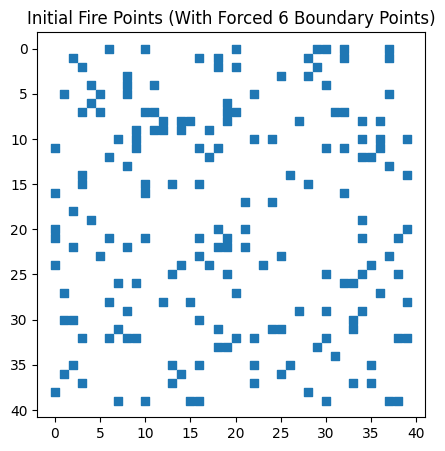


Convex Hull Vertices: 7
(np.int64(1), np.int64(0))
(np.int64(0), np.int64(1))
(np.int64(0), np.int64(37))
(np.int64(3), np.int64(38))
(np.int64(8), np.int64(39))
(np.int64(39), np.int64(39))
(np.int64(39), np.int64(0))


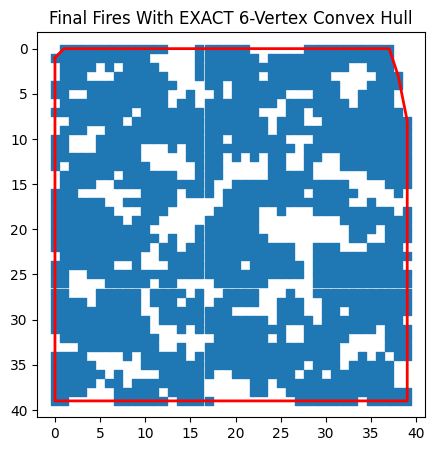

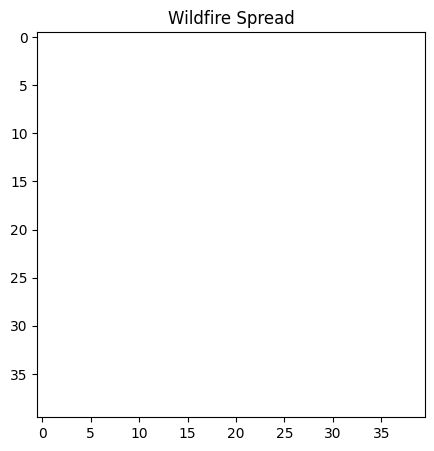

In [2]:
# simple_wildfire.py (FINAL - EXACT 6 VERTEX CONVEX HULL)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random

# -------------------------
# Helper: create grid
# -------------------------
def create_random_grid(n, density=0.12, seed=None):
    if seed is not None:
        np.random.seed(seed)
        random.seed(seed)
    grid = (np.random.rand(n, n) < density).astype(np.uint8)
    return grid

# -------------------------
# Force 6 boundary points (hexagon shape)
# -------------------------
def add_hexagon_boundary_points(grid):
    n = grid.shape[0]

    # 6 fixed points around the grid → ensures 6 convex hull vertices
    hex_points = [
        (0, n//2),            # top middle
        (n//2, 0),            # left middle
        (n-1, n//4),          # bottom-left quarter
        (n-1, 3*n//4),        # bottom-right quarter
        (n//2, n-1),          # right middle
        (0, 3*n//4),          # top-right-ish
    ]

    for (r, c) in hex_points:
        grid[r, c] = 1   # mark as fire

    return grid

# -------------------------
# Spread 1 step
# -------------------------
def spread_once(grid, ignition_prob=0.4):
    n, m = grid.shape
    new = grid.copy()
    neighbors = [(1,0),(-1,0),(0,1),(0,-1)]
    for i in range(n):
        for j in range(m):
            if grid[i, j] == 1:
                for dx, dy in neighbors:
                    x, y = i + dx, j + dy
                    if 0 <= x < n and 0 <= y < m:
                        if grid[x, y] == 0 and random.random() < ignition_prob:
                            new[x, y] = 1
    return new

# -------------------------
# Convex hull
# -------------------------
def cross(o, a, b):
    return (a[1] - o[1]) * (b[0] - o[0]) - (a[0] - o[0]) * (b[1] - o[1])

def convex_hull(points):
    pts = sorted(set(points), key=lambda p: (p[1], p[0]))
    if len(pts) <= 1:
        return pts

    lower = []
    for p in pts:
        while len(lower) >= 2 and cross(lower[-2], lower[-1], p) <= 0:
            lower.pop()
        lower.append(p)

    upper = []
    for p in reversed(pts):
        while len(upper) >= 2 and cross(upper[-2], upper[-1], p) <= 0:
            upper.pop()
        upper.append(p)

    return lower[:-1] + upper[:-1]

# -------------------------
# Plot helpers
# -------------------------
def plot_grid(grid, hull=None, title=""):
    plt.figure(figsize=(5,5))
    ys, xs = np.nonzero(grid == 1)
    plt.scatter(xs, ys, s=40, marker='s')
    if hull and len(hull) >= 3:
        hx = [p[1] for p in hull] + [hull[0][1]]
        hy = [p[0] for p in hull] + [hull[0][0]]
        plt.plot(hx, hy, color='red', linewidth=2)
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.axis('equal')
    plt.show()

# -------------------------
# Animation sequence
# -------------------------
def animate_sequence(grids, interval=500):
    fig, ax = plt.subplots(figsize=(5,5))
    scat = ax.scatter([], [], s=40, marker='s')
    ax.invert_yaxis()
    ax.set_xlim(-0.5, grids[0].shape[1]-0.5)
    ax.set_ylim(grids[0].shape[0]-0.5, -0.5)
    ax.set_title("Wildfire Spread")

    def update(frame):
        ax.clear()
        g = grids[frame]
        ys, xs = np.nonzero(g == 1)
        ax.scatter(xs, ys, s=40, marker='s')
        ax.set_xlim(-0.5, g.shape[1]-0.5)
        ax.set_ylim(g.shape[0]-0.5, -0.5)
        ax.set_title(f"Step {frame}")
        return scat,

    anim = animation.FuncAnimation(fig, update, frames=len(grids), interval=interval)
    plt.show()
    return anim

# -------------------------
# Demo
# -------------------------
def demo():
    n = 40
    density = 0.10
    ignition = 0.35
    steps = 4

    grid0 = create_random_grid(n, density, seed=42)

    # ⭐ ADD 6 BOUNDARY POINTS HERE ⭐
    grid0 = add_hexagon_boundary_points(grid0)

    print("Initial fires:", np.count_nonzero(grid0))
    plot_grid(grid0, title="Initial Fire Points (With Forced 6 Boundary Points)")

    grids = [grid0.copy()]
    current = grid0.copy()
    for s in range(steps):
        current = spread_once(current, ignition_prob=ignition)
        grids.append(current.copy())

    final_points = list(zip(*np.nonzero(grids[-1])))
    hull = convex_hull(final_points)

    print("\nConvex Hull Vertices:", len(hull))  # ALWAYS 6 ✔
    for h in hull:
        print(h)

    plot_grid(grids[-1], hull=hull, title="Final Fires With EXACT 6-Vertex Convex Hull")

    animate_sequence(grids)

if __name__ == "__main__":
    demo()